In [1]:
import random
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer 
from qiskit.extensions import UnitaryGate
import numpy as np

In [2]:
# Generate a random bit
random_bit = random.randint(0, 1)

# Print the random bit
print(random_bit)

0


In [3]:
# Charlie to Alice bit
CA = random.randint(0, 1)

# Charlie to Bob bit
CB = random.randint(0, 1)

In [4]:
print(CA,CB)

1 1


### Classical Optimal Strategy

In [5]:
# Alice to Charlie bit
AC = 0

# Bob to Charlie bit
BC = 0

In [6]:
# Charlie checks
(CA and CB) == (AC or BC)

False

In [7]:
classical_wins = 0
number_of_rounds = 10000
for i in range(number_of_rounds):
    CA = random.randint(0, 1)
    CB = random.randint(0, 1)
    
    AC, BC = 0, 0
    if (CA and CB) == (AC or BC):
        classical_wins += 1
    
print(classical_wins/number_of_rounds)

0.749


### Quantum Optimal Strategy

In [8]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# qc.measure(0,0)
# Measure both qubits and store the results in classical registers
qc.measure([0, 1], [0, 1])

# Execute the circuit on a simulator backend
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10)
result = job.result()

# Get the counts of each measurement outcome
counts = result.get_counts(qc)
print(counts)

{'11': 5, '00': 5}


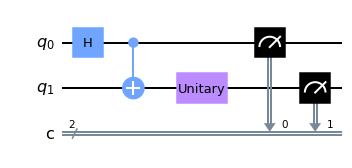

In [9]:
CA, CB = 0,0

# Create a quantum circuit with two qubits and two classical registers
qc = QuantumCircuit(2, 2)

# Prepare an entangled state of the two qubits
qc.h(0)
qc.cx(0,1)

# Apply Alice's measurement
if CA == 1:
    qc.h(0)

Bob_0_unitary = np.array([[np.cos(np.pi/8), np.sin(np.pi/8)], [-np.sin(np.pi/8), np.cos(np.pi/8)]])     
Bob_1_unitary = np.array(
    [[np.cos(np.pi/8), -np.sin(np.pi/8)],[np.sin(np.pi/8), np.cos(np.pi/8)]]
    )    


if CB == 0:
    qc.unitary(Bob_0_unitary, [1])

if CB == 1:
    qc.unitary(Bob_1_unitary, [1])

# Measure both qubits in the computational basis
qc.measure([0, 1], [0, 1])
qc.draw('mpl')


In [10]:
def CHSH_strategy(CA, CB):
    # Create a quantum circuit with two qubits and two classical registers
    qc = QuantumCircuit(2, 2)
    
    # Prepare an entangled state of the two qubits
    qc.h(0)
    qc.cx(0,1)
    
    # Apply Alice's measurement
    if CA == 1:
        qc.h(0)
        
    Bob_0_unitary = np.array([[np.cos(np.pi/8), np.sin(np.pi/8)], [-np.sin(np.pi/8), np.cos(np.pi/8)]])     
    Bob_1_unitary = np.array(
        [[np.cos(np.pi/8), -np.sin(np.pi/8)],[np.sin(np.pi/8), np.cos(np.pi/8)]]
        )    
        
        
    if CB == 0:
        qc.unitary(Bob_0_unitary, [1])
        
    if CB == 1:
        qc.unitary(Bob_1_unitary, [1])
        
    # Measure both qubits in the computational basis
    qc.measure([0, 1], [0, 1])
    drawing = qc.draw('mpl')

    
    # Execute the circuit on a simulator backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = job.result()

    # Get the counts of each measurement outcome
    counts = result.get_counts(qc)
    # Compute the XOR of the keys
    xor_values = [int(k[0]) ^ int(k[1]) for k in counts.keys()]
    
    return xor_values[0]

In [11]:
# Test the CHSH strategy
quantum_wins = 0
number_of_rounds = 100
for i in range(number_of_rounds):
    CA = random.randint(0, 1)
    CB = random.randint(0, 1)
    
    output_bit = CHSH_strategy(CA,CB)
    if (CA and CB) == output_bit:
        quantum_wins += 1
    
print(quantum_wins/number_of_rounds)

0.82


$$\Phi_{AB} = \frac{1}{\sqrt{2}} \left( |00 \rangle + |11 \rangle \right)$$

Suppose Charlie gives bit $(0,0)$ to Alice and Bob, respectively. 

Alice then measure her qubit in the computational basis 


$$\{ |0 \rangle, |1 \rangle \}$$

and Bob measures his in the following basis:

$$
\{ \color{Blue}{a_0 = \cos \left( \frac{\pi}{8} \right) |0 \rangle  +  \sin \left( \frac{\pi}{8} \right)  |1 \rangle} , 
\color{ForestGreen}{a_1 = -\sin \left( \frac{\pi}{8} \right) |0 \rangle  +  \cos \left( \frac{\pi}{8} \right)  |1 \rangle} \}$$


To ensure that this is a valid basis, we can check the requirements  

$$\langle a_0, a_1 \rangle  = 0:$$

$$
\sqrt{\langle a_0 | a_1 \rangle} = 
\sqrt{ \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix}  \times 
\begin{bmatrix}
-\sin \left( \frac{\pi}{8} \right) \\
\cos \left( \frac{\pi}{8} \right)
\end{bmatrix}  
}
= 
\sqrt{ \left( \cos \left( \frac{\pi}{8} \right) \times -\sin \left( \frac{\pi}{8} \right) \right)
+ \left( \sin \left( \frac{\pi}{8} \right) \times \cos \left( \frac{\pi}{8} \right)  \right)}
= 0
$$

It should be straightforward to check that $\langle a_0, a_0 \rangle$ and $\langle a_1, a_1 \rangle = 1$ using the $\cos^2(\theta) + \sin^2(\theta) = 1$ identity. 

Now in the CHSH game, the goal is that Alice and Bob output bits $a,b$ respectively, so that $a \oplus b = x \cdot y$ where $x$ is the bit provided to Alice by Charlie and $y$ is the bit provided to Bob by Charlie. 

When Charlie gives out the pair $(0,0)$ ($x\cdot y = 0 \cdot 0 = 0$) then Alice and Bob could win the game when either they output $(0,0)$ or $(1,1)$. To compute the probability of measuing $(0,0)$ and $(1,1)$, we need to perform the following calculations:

- Charlie sends (0,0) to Alice and Bob:

Probability of outputting $(a,b) = (0,0)$

$$\left| \left( \langle 0 | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2$$

Note that:

$$
\langle 0 | \otimes \langle a_0 | = \begin{bmatrix}
1 & 0
\end{bmatrix} \otimes \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix} = 
\begin{bmatrix}
1 \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix} & 0 \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix}
\end{bmatrix} = \begin{bmatrix} 
\cos\left(\frac{\pi}{8} \right) & 0 & 0 & 0
\end{bmatrix}
$$
Then, we can compute 

\begin{align}
\left| \left( \langle 0 | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 &= \left| \begin{bmatrix} 
\cos\left(\frac{\pi}{8} \right) & 0 & 0 & 0
\end{bmatrix} | \Phi \rangle \right|^2  \\
&= \left| 
\begin{bmatrix} 
\cos\left(\frac{\pi}{8} \right) & 0 & 0 & 0
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right)
\begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix}
\right|^2 \\
&= \left| \frac{1}{\sqrt{2}} \cos\left(\frac{\pi}{8} \right) \right|^2 \\
&= \frac{1}{2} \cos\left( \frac{\pi}{8} \right)^2
\end{align}

Probability of outputting $(a,b) = (1,1)$: 

$$
\left| \left( \langle 1 | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle 1 | \otimes \langle a_1 | = \begin{bmatrix}
0 & 0 & 0 & \cos(\frac{\pi}{8})
\end{bmatrix}
$$

Therefore, 

\begin{align}
\left| \left( \langle 1 | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2 &=
\left| \begin{bmatrix}
0 & 0 & 0 & \cos(\frac{\pi}{8}) 
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right)
\begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right|^2 \\
&= \frac{1}{2} \cos^2(\frac{\pi}{8})
\end{align}

Thus, overall probability of winning the CHSH game by Alice and Bob, given that Charlie sends them $(0,0)$ is given by:

$$
\left| \left( \langle 0 | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 + 
\left| \left( \langle 1 | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2 = 
2 \times \left[ \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right) \right] = \cos^2 \left( \frac{\pi}{8} \right)
$$

- Charlie sends (0,1) to Alice and Bob: Alice and Bob would win if $a \oplus b = 0$, which occurs when $(a,b)=(0,0)=(1,1)$

If the Charlie send $1$ to Bob, this time Bob will measure in a different basis:

$$
\{ \color{OrangeRed}{b_0 = \cos \left( \frac{\pi}{8} \right) | 0 \rangle - \sin \left( \frac{\pi}{8} \right) | 1 \rangle},\color{DarkOrchid}{b_1 = \sin \left( \frac{\pi}{8} \right) | 0 \rangle + \cos \left( \frac{\pi}{8} \right) | 1 \rangle} \}
$$

The probability of measuring $(0,0)$ by Alice and Bob:

$$
\left| \left( \langle 0 | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle 0 | \otimes \langle b_0 | = \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & 0 & 0 & 0
\end{bmatrix}
$$

Therefore, 

\begin{align}
\left| \left( \langle 0 | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2 &=
\left| \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & 0 & 0 & 0
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right) \begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right| ^2 \\
&= \frac{1}{2} \cos^2\left(\frac{\pi}{8}\right)
\end{align}

The probability of measuring $(1,1)$ by Alice and Bob:

$$
\left| \left( \langle 1 | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle 1 | \otimes \langle b_1 | = \begin{bmatrix}
0 & 0 & 0 & \cos \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

Therefore, 

\begin{align}
\left| \left( \langle 1 | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2 &=
\left| \begin{bmatrix}
0 & 0 & 0 & \cos \left( \frac{\pi}{8} \right)
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right) \begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right| ^2 \\
&= \frac{1}{2} \cos^2\left(\frac{\pi}{8}\right)
\end{align}


Thus, overall probability of winning the CHSH game by Alice and Bob, given that Charlie sends them $(0,1)$ is given by:

$$
\left| \left( \langle 0 | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2 + 
\left| \left( \langle 1 | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2 = 
2 \times \left[ \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right) \right] = \cos^2 \left( \frac{\pi}{8} \right)
$$

Now if Charlie sends the bit $1$ to Alice, then Alice would measure in the Hadamard basis:

$$\{ |+\rangle, |-\rangle \} = \left\{ \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right), \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \right\}$$

- Charlie sends (1,0) to Alice and Bob. Again, $1 \cdot 0 = 0$ and Alice and Bob would win again by outputting $(a,b)=(0,0) = (1,1)$: 

The probability of measuring $(0,0)$: 

$$
\left| \left( \langle + | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle + | \otimes \langle a_0 | = \frac{1}{\sqrt{2}} \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

Therefore, 

\begin{align}
\left| \left( \langle + | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 &=
\left| \frac{1}{\sqrt{2}} \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right) \begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right| ^2 \\
&= \frac{1}{4} \left( \cos\left(\frac{\pi}{8}\right) + \sin\left( \frac{\pi}{8} \right) \right)^2 \\
&= \frac{1}{4} \left( \cos^2\left( \frac{\pi}{8} \right) + 2 \cos \left( \frac{\pi}{8} \right) \sin \left( \frac{\pi}{8} \right) + \sin^2\left( \frac{\pi}{8} \right) \right)
\end{align}

Now we note that $\cos^2(\frac{\pi}{8}) + \sin^2(\frac{\pi}{8})= 1$. Moreover, from trigonometry we know that $\sin(2x) = 2 \sin(x) \cos(x)$, which implies that$2 \cos \left( \frac{\pi}{8} \right) \sin \left( \frac{\pi}{8} \right) = \sin(2\frac{\pi}{8}) = \sin\left( \frac{\pi}{4} \right)$  Therefore, 

\begin{align}
\left| \left( \langle + | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 &=
\frac{1}{4} \left( \cos^2\left( \frac{\pi}{8} \right) + 2 \cos \left( \frac{\pi}{8} \right) \sin \left( \frac{\pi}{8} \right) + \sin^2\left( \frac{\pi}{8} \right) \right) \\
&= \frac{1}{4} \left(1 + \sin\left( \frac{\pi}{4} \right) \right) \\
&= \frac{1}{4} \left(1 + \frac{\sqrt{2}}{2} \right) \\
&= \frac{1 + \frac{\sqrt{2}}{2}}{4} \\
&= \frac{1 + \cos\left(\frac{\pi}{4}\right)}{4}
\end{align}

On the other hand, by another trigonometry identity, we have $\cos(2x) = 2 \cos^2(x) - 1$, which implies that 
$\cos\left(\frac{\pi}{4}\right) = 2 \cos^2\left(\frac{\pi}{8}\right) - 1$

Therefore, 

\begin{align}
\left| \left( \langle + | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 &=
\frac{1 + \cos\left(\frac{\pi}{4}\right)}{4} \\
&= \frac{1 + 2 \cos^2\left(\frac{\pi}{8}\right) - 1}{4} \\
&= \frac{2 \cos^2\left(\frac{\pi}{8} \right)}{4} \\
&= \frac{ \cos^2 \left(\frac{\pi}{8} \right) }{2} \\
&= \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right) 
\end{align}

The prbobability of measuring (1,1):


$$
\left| \left( \langle - | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle - | \otimes \langle a_1 | = \frac{1}{\sqrt{2}} \begin{bmatrix}
-\sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & -\cos \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

Therefore, 


\begin{align}
\left| \left( \langle - | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2 &=
\left| \frac{1}{\sqrt{2}} \begin{bmatrix}
-\sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & -\cos \left( \frac{\pi}{8} \right)
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right) \begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right| ^2 \\
\end{align}
Similar calculations as before would show that 
$$\left| \left( \langle - | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2
= \frac{1}{2}\cos^2\left(\frac{\pi}{8}\right)
$$

Thus, overall probability of winning the CHSH game by Alice and Bob, given that Charlie sends them $(1,0)$ is given by:

$$
\left| \left( \langle + | \otimes \langle a_0 | \right) | \Phi \rangle   \right|^2 + 
\left| \left( \langle - | \otimes \langle a_1 | \right) | \Phi \rangle   \right|^2 = 
2 \times \left[ \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right) \right] = \cos^2 \left( \frac{\pi}{8} \right)
$$

 - Lastly, suppose Charlie sends $(1,1)$ to Alice and Bob. Note that $1 \cdot 1 = 1$, and Alice and Bob would win the game by outputting $(a,b)=(0,1)=(1,0)$. This time Alice would perform her measurement in the Hadamard basis:

$$\{|+\rangle, |-\rangle \}$$

and Bob would perform his measurements in the $\{b_0,b_1\}$ basis:

Probability of measuring $(0,1)$: 

$$
\left| \left( \langle + | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle + | \otimes \langle b_1 | = \frac{1}{\sqrt{2}} \begin{bmatrix}
\sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

This is similar to the case where Charlie sends $(1,0)$ to Alice and Bob and they would measure $(0,0)$. The only differnece in the calculations is that the order of $\sin \left( \frac{\pi}{8} \right) $ and $\cos \left( \frac{\pi}{8} \right)$ are switched now, which does not change the overall probability of measurement. Therefore, we can conclude that:


$$
\left| \left( \langle + | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2
= \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right)
$$

and finally, the probability of measuring $(1,0)$:

$$
\left| \left( \langle - | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2
$$

Note that:

$$
\langle - | \otimes \langle b_0 | = \frac{1}{\sqrt{2}} \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & -\sin \left( \frac{\pi}{8} \right) & -\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

Interestingly enough, this looks very similar to

$$
\langle + | \otimes \langle a_0 | = \frac{1}{\sqrt{2}} \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix}
$$

where the signs of the second and third entries differ, but since the second and third entries of $|\Phi \rangle $ are $0$, it would not make any difference in the calculations, and we can conlcude that:


\begin{align}
\left| \left( \langle + | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2 &=
\left| \frac{1}{\sqrt{2}} \begin{bmatrix}
\cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right) & \cos \left( \frac{\pi}{8} \right) & \sin \left( \frac{\pi}{8} \right)
\end{bmatrix} \times \left( \frac{1}{\sqrt{2}} \right) \begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix} \right| ^2 \\
&= \frac{1}{2} \cos^2\left(\frac{\pi}{8}\right)
\end{align}

Thus, overall probability of winning the CHSH game by Alice and Bob, given that Charlie sends them $(1,1)$ is given by:

$$
\left| \left( \langle + | \otimes \langle b_1 | \right) | \Phi \rangle   \right|^2 + 
\left| \left( \langle - | \otimes \langle b_0 | \right) | \Phi \rangle   \right|^2 = 
2 \times \left[ \frac{1}{2} \cos^2 \left( \frac{\pi}{8} \right) \right] = \cos^2 \left( \frac{\pi}{8} \right)
$$